# Task 2

## General instructions

First, update the following cell to have a link to your Homework 2 GitHub repository

**UPDATE THIS LINK**
https://github.com/p-park6/eds220-hwk-2

Add comments for all your code and commit as needed. Err on the side of commenting and commiting too much for now.


## About the data

In this task you will use [Air Quality Index (AQI)](https://www.airnow.gov/aqi/aqi-basics/) data from the [US Environmental Protection Agency](https://www.epa.gov) to visualize the impact on the AQI of the 2017 [Thomas Fire](https://en.wikipedia.org/wiki/Thomas_Fire) in Santa Barbara County. 

## FINAL CODE

You will use the next cell at the end of the task. Leave it blank for now. 

In [1]:
### ===== FINAL CODE =====
#Workflow

import pandas as pd

# read in daily AQI 2017 zip file from url
aqi_17 = pd.read_csv("https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2017.zip")

# read in daily AQI 2018 zip file from url
aqi_18 = pd.read_csv("https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2018.zip")

#join the two datasets together
aqi = pd.concat([aqi_17, aqi_18])

##rename column
# re-assign the column names - .str.lower() makes them lower case and add
# re-assign the column names again - .str.replace(' ','_') replaces the space for _
aqi.columns = aqi.columns.str.lower().str.replace(' ','_')

# change date type to be in datetime object (can be ran only one time)
aqi_sb.date = pd.to_datetime(aqi_sb.date)

#change index to be set to date
aqi_sb = aqi_sb.set_index('date')

#create a new column that is the 5 day rolling average mean
aqi_sb['five_day_average'] = aqi_sb.aqi.rolling('5D').mean()

#Plot data
aqi_sb.plot(y = ['aqi', 'five_day_average'], #plot both aqi and five_day_average column
           title = 'AQI in Santa Barbara', #add title to graph
           xlabel = 'Year', #add x label to graph
           ylabel = 'Air Quality Index (AQI)', #add y label to graph
           color = {'aqi': 'blue', #add blue to aqi line
                    'five_day_average': 'orange' #add orange to five_day_average line
                   }
           )

URLError: <urlopen error [Errno 101] Network is unreachable>

## 1

1. Go to [EPA's website on Air Quality Data Collected at Outdoor Monitors Across the US](https://www.epa.gov/outdoor-air-quality-data). 
2. Under "Donwload Data" click on "Pre-generated Data Files"
3. Click on "Tables of Daily AQI"
4. Copy the URL to the 2017 Daily AQI **by County** zip file `daily_aqi_by_county_2017.zip`
5. In the next code cell read in the data from the URL using the `pd.read_csv` function and store it as `aqi_17`. 
6. In the same cell, read in the data for the 2018 Daily AQI by County zip file and store it as `aqi_18`.

In [ ]:
import pandas as pd

In [ ]:
# read in daily AQI 2017 zip file from url
aqi_17 = pd.read_csv("https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2017.zip")

# read in daily AQI 2018 zip file from url
aqi_18 = pd.read_csv("https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2018.zip")

## 2 
(a) and (b) Use the next two cells to look at the head of both data frames.

(c) Use this cell to make some other preliminary data exploration of your choosing.

In [ ]:
# (a)
#look at the first 5 observations of aqi 17
aqi_17.head()

In [ ]:
# (b)
#look at the first 5 observations of aqi 18
aqi_18.head()

In [ ]:
# (c) 
#look at the last 5 observations of aqi 17
print(aqi_17.tail())

#look at the last 5 observations of aqi 18
print(aqi_18.tail())

#look at unique columns in aqi 17
print(aqi_17.columns)

#look at unique columns in aqi 18
print(aqi_18.columns)

## 3
We currently have two separate dataframes. For this exercise we will need to "glue" them one on top of the other. The pandas function `pd.concat()` can achieve this. 

Pass `[aqi_17, aqi_18]` as the input of `pd.concat()` and store the output as  `aqi`.  
In the next line run `aqi`.

👀 NOTE: When we concatenate like this, without any extra parameters for `pd.concat()` the indices for the two dataframes are just "glued together", the index of the resulting dataframe is not updated to start from 0. Notice the index of `aqi` ends in 327536 while it has 654338 rows.


In [ ]:
#join the two datasets together
aqi = pd.concat([aqi_17, aqi_18])
aqi

## 4

Run the follwoing cell and read the comments to understand how the column names are being updated.

In [ ]:
# initial column names: notice caps and spaces (difficult to work with!)
print(aqi.columns, '\n')

# re-assign the column names - .str.lower() makes them lower case
aqi.columns = aqi.columns.str.lower()
print(aqi.columns, '\n')

#  re-assign the column names again - .str.replace(' ','_') replaces the space for _
aqi.columns = aqi.columns.str.replace(' ','_')
print(aqi.columns)

# as a "one liner" you could achieve this column name cleaning like this:
# aqi.columns = aqi.columns.str.lower().str.replace(' ','_')

## 5 
In the next cell:
- Select only data from `Santa Barbara` county and store in a new variable `aqi_sb`.
- Remove the `state_name`, `county_name`, `state_code` and `county_code` columns from `aqi_sb`. 
- Use the `dtypes` attribute to check the data types of the columns. What do you notice for the date column?

In [ ]:
#filter for observations that are in Santa Barbara County
aqi_sb = aqi[aqi['county_name'] == 'Santa Barbara']

#print aqi_sb dataframe
print(aqi_sb)

#remove 
aqi_sb = aqi_sb.drop(columns=['state_name','county_name','state_code','county_code'])

#use column function on aqi_sb dataframe to see if columns were removed
print(aqi_sb.columns)

#use dtypes to check for data types
aqi_sb.dtypes

**Answer**: I notice that the date type is as an object. I would expect it to be in a datetime type.

## 6
In the next cell:
1. Update the date column of `aqi_sb` to be a datetime object.
2. Update the index of `aqi_sb` to be the date column.

In [39]:
# change date type to be in datetime object (can be ran only one time)
aqi_sb.date = pd.to_datetime(aqi_sb.date)
#print out the column types to see if date type was changed
print(aqi_sb.dtypes)

#change index to be set to date
aqi_sb = aqi_sb.set_index('date')
#look at observations to see if the index has changed to date
aqi_sb.head()

date                         datetime64[ns]
aqi                                   int64
category                             object
defining_parameter                   object
defining_site                        object
number_of_sites_reporting             int64
dtype: object


,aqi,category,defining_parameter,defining_site,number_of_sites_reporting
date,,,,,
2017-01-01,39,Good,Ozone,06-083-4003,12
2017-01-02,36,Good,Ozone,06-083-4003,11
2017-01-03,71,Moderate,PM10,06-083-4003,12
2017-01-04,34,Good,Ozone,06-083-4003,13
2017-01-05,37,Good,Ozone,06-083-4003,12


## 7
In the next cell, check that you've updated the index by accessing the index of `aqi_sb`  by running `aqi_sb.index`. Add in a comment what is the data type (dtype) of the index.

In [40]:
#check to see if the index has been updated to date
aqi_sb.index

#comment: the dtype is datetime64[ns]

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
               '2017-01-09', '2017-01-10',
               ...
               '2018-12-22', '2018-12-23', '2018-12-24', '2018-12-25',
               '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-29',
               '2018-12-30', '2018-12-31'],
              dtype='datetime64[ns]', name='date', length=730, freq=None)

## 8
Run the next cell and read through the comments. They will explain how to calculate an average over a [rolling window](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.rolling.html).




In [41]:
# rolling() is a method for pandas.series that provides rolling window calculations
# the parameter '5D' indicates we want the window to be 5 days
# This is a lazy method (think groupby), we need to specify what we want to calculate over each window
# here we add the aggregator function mean()
# this indicates we want the mean over each window
# and we get a pd.Series as ouput
aqi_sb.aqi.rolling('5D').mean()

date
2017-01-01    39.000000
2017-01-02    37.500000
2017-01-03    48.666667
2017-01-04    45.000000
2017-01-05    43.400000
                ...    
2018-12-27    38.600000
2018-12-28    38.600000
2018-12-29    38.200000
2018-12-30    37.800000
2018-12-31    38.400000
Name: aqi, Length: 730, dtype: float64

## 9 

Without creating any new variables, add the mean of the AQI over a 5-day rolling window as a new column named 'five_day_average' to the `aqi_sb` dataframe. 

In [50]:
#create a new column that is the 5 day rolling average mean
aqi_sb['five_day_average'] = aqi_sb.aqi.rolling('5D').mean()
#print the data table to see if the new column has been created
aqi_sb.head()

,aqi,category,defining_parameter,defining_site,number_of_sites_reporting,five_day_average
date,,,,,,
2017-01-01,39,Good,Ozone,06-083-4003,12,39.000000
2017-01-02,36,Good,Ozone,06-083-4003,11,37.500000
2017-01-03,71,Moderate,PM10,06-083-4003,12,48.666667
2017-01-04,34,Good,Ozone,06-083-4003,13,45.000000
2017-01-05,37,Good,Ozone,06-083-4003,12,43.400000


## 10
Make a line plot showing both the daily AQI and the 5-day average (5-day average on top of the AQI). Update the title and colors of the graph. Can you see the AQI going up during the Thomas Fire in December 2017?

<AxesSubplot:title={'center':'AQI in Santa Barbara'}, xlabel='Year', ylabel='Air Quality Index (AQI)'>

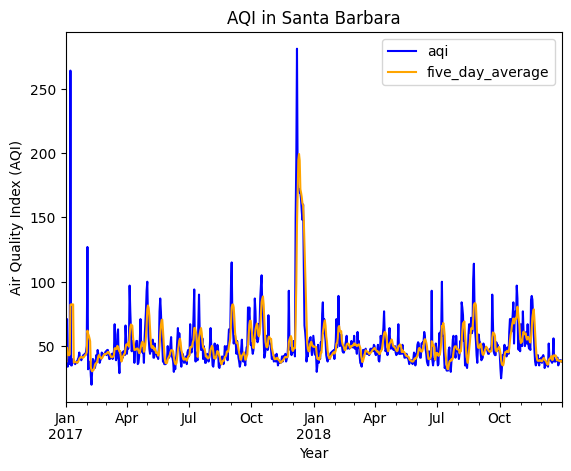

In [67]:
#look at data table to see data contained in it
aqi_sb.head()

#Plot data
aqi_sb.plot(y = ['aqi', 'five_day_average'], #plot both aqi and five_day_average column
           title = 'AQI in Santa Barbara', #add title to graph
           xlabel = 'Year', #add x label to graph
           ylabel = 'Air Quality Index (AQI)', #add y label to graph
           color = {'aqi': 'blue', #add blue to aqi line
                    'five_day_average': 'orange' #add orange to five_day_average line
                   }
           )

**Comment**: At around December 2017, There is a large spike in the AQI with both the daily and 5 day average. Surprisingly, there in an increase in AQI at January 2017. I assume there was a fire at the beginning of that year.

## 11

Collect all the relevant code into the first blank cell of the notebook titled "FINAL CODE". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The *only* ouput of this cell should be the graph you produced in the previous exercise. For each line, add a single comment explaining what the code does.